# Graduate Admissions Prediction with Machine Learning
This dataset is created by **Mohan S Acharya** to estimate chances of graduate admission. The following analysis helps to understand what factors are important in graduate admissions and how these factors are interrelated among themselves. In addition, it will  help predict one's chances of graduate admission.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
# Serial No. is irrelevant and is dropped.
df = df.drop(['Serial No.'], axis = 1)

In [3]:
df.isnull().sum() #confirm there is no null value

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Visualizing the distribution of the variables of graduate applicants

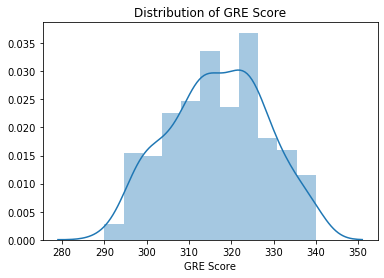

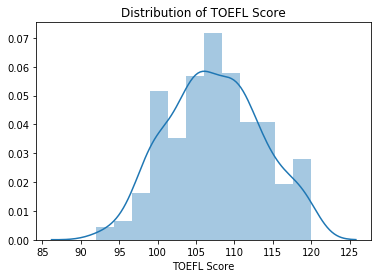

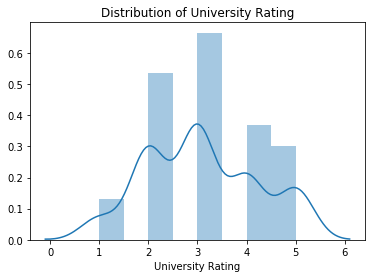

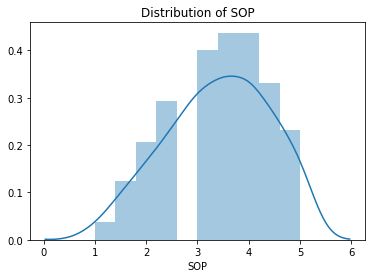

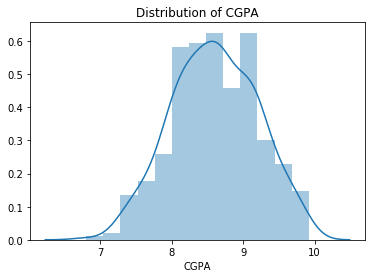

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.distplot(df['GRE Score'], kde=True)
plt.title ('Distribution of GRE Score')
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=True)
plt.title ('Distribution of TOEFL Score')
plt.show()

fig = sns.distplot(df['University Rating'], kde=True)
plt.title ('Distribution of University Rating')
plt.show()

fig = sns.distplot(df['SOP'], kde=True)
plt.title ('Distribution of SOP')
plt.show()

fig = sns.distplot(df['CGPA'], kde=True)
plt.title ('Distribution of CGPA')
plt.show()


The data are normally distributed.

## Understanding the relation between factors responsible for graduate admissions

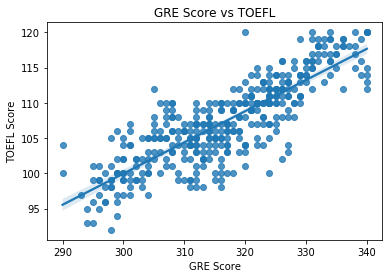

In [5]:
fig = sns.regplot(x='GRE Score', y='TOEFL Score', data = df)
plt.title("GRE Score vs TOEFL")
plt.show()

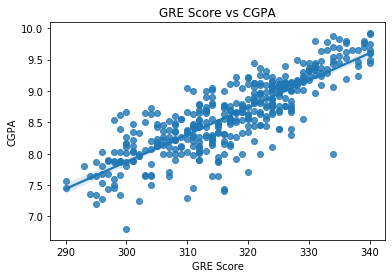

In [6]:
fig= sns.regplot(x='GRE Score', y='CGPA', data = df)
plt.title('GRE Score vs CGPA')
plt.show()

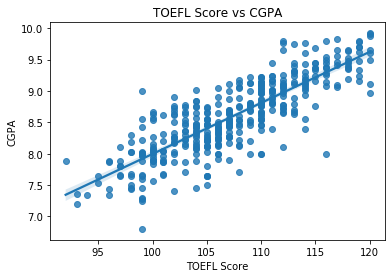

In [7]:
fig= sns.regplot(x='TOEFL Score', y='CGPA', data = df)
plt.title('TOEFL Score vs CGPA')
plt.show()

There are clear linear relationships between different scores
Now let's look at the relation between GPA, Research, and letter of recommendation

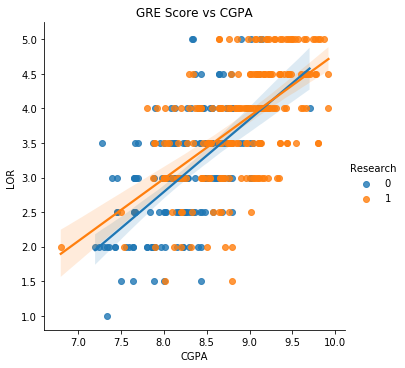

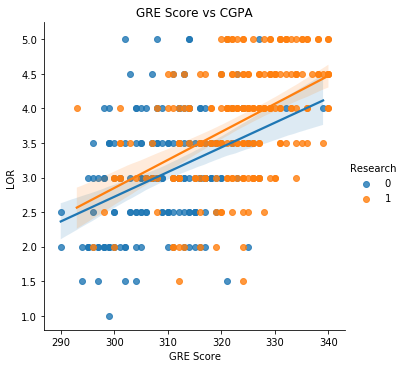

In [8]:
fig = sns.lmplot(x='CGPA', y= 'LOR ', data=df, hue='Research')
plt.title('GRE Score vs CGPA')
plt.show()
fig = sns.lmplot(x='GRE Score', y= 'LOR ', data=df, hue='Research')
plt.title('GRE Score vs CGPA')
plt.show()

Research experience is closely related to good letter of recommendation, which is justified because academic research supervisors develop personal relationship with their student research assistants. It allows supervisors to write in-depth and tailored letters that are informative and credible.

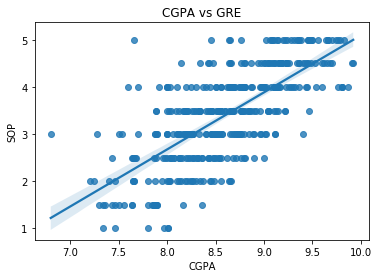

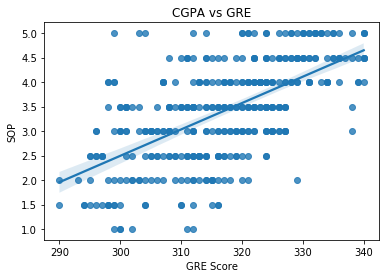

In [9]:
fig = sns.regplot(x='CGPA', y='SOP', data=df)
plt.title('CGPA vs GRE')
plt.show()

fig = sns.regplot(x='GRE Score', y = 'SOP', data=df)
plt.title('CGPA vs GRE')
plt.show()

## Visualize Correlations among Variables

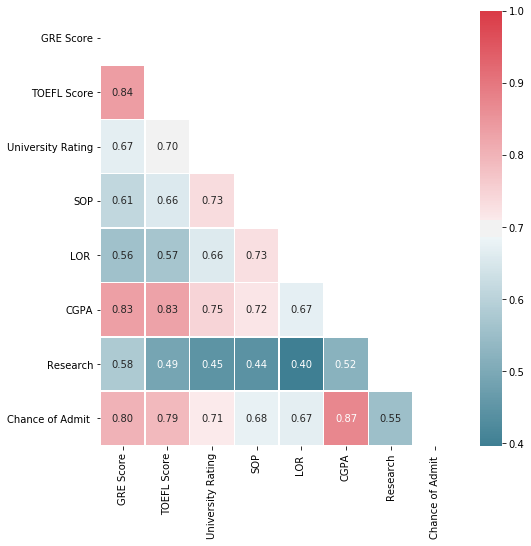

In [10]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
#select color
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#dropSelf generates a mask for the upper portion of the matrix
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt='.2f', mask=dropSelf)
plt.show()

    ## Machine Learning

In [11]:
# Let's split the dataset with training and testing set and prepare the inputs and outputs
from sklearn.model_selection import train_test_split

x = df.drop(['Chance of Admit '], axis = 1)
y = df['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [27]:
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

In [20]:
for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

DecisionTree : 0.09293142633146229
Linear Regression : 0.06473311695782089
RandomForest : 0.07064966737359776
KNeighbours : 0.083342291185208
SVM : 0.0818072704465048
AdaBoostClassifier : 0.08213542235828039
GradientBoostingClassifier:  0.06639466197192088
CatBoost:  0.07153086676897127
Lasso:  0.1313765707596043
Ridge:  0.06479970981992432
BayesianRidge:  0.06489639576721208
ElasticNet:  0.09805987388222617
HuberRegressor:  0.06875457502549781


Linear regression performs the best in this case.

## Generate Feature Importances

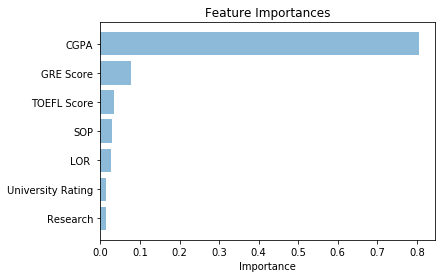

In [26]:
classifier = RandomForestRegressor()
classifier.fit(x,y)
feature_names = x.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = x.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

# Visualize Feature Importance
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

It seems that CGPA is the most factor for graduate admissions followed by GRE Score.